Dataset loaded successfully!

Dataset Head:
   work_year experience_level employment_type                       job_title  \
0       2021               MI              FT                  Data Scientist   
1       2021               MI              FT                 BI Data Analyst   
2       2020               MI              FT                  Data Scientist   
3       2021               MI              FT                     ML Engineer   
4       2022               SE              FT  Lead Machine Learning Engineer   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  30400000             CLP          40038                 CL           100   
1  11000000             HUF          36259                 HU            50   
2  11000000             HUF          35735                 HU            50   
3   8500000             JPY          77364                 JP            50   
4   7500000             INR          95386                 IN            5

C:\Users\user\AppData\Local\Temp\ipykernel_10544\3267503351.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


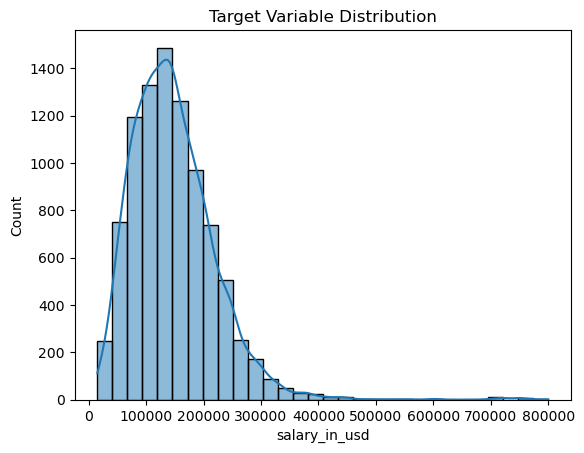

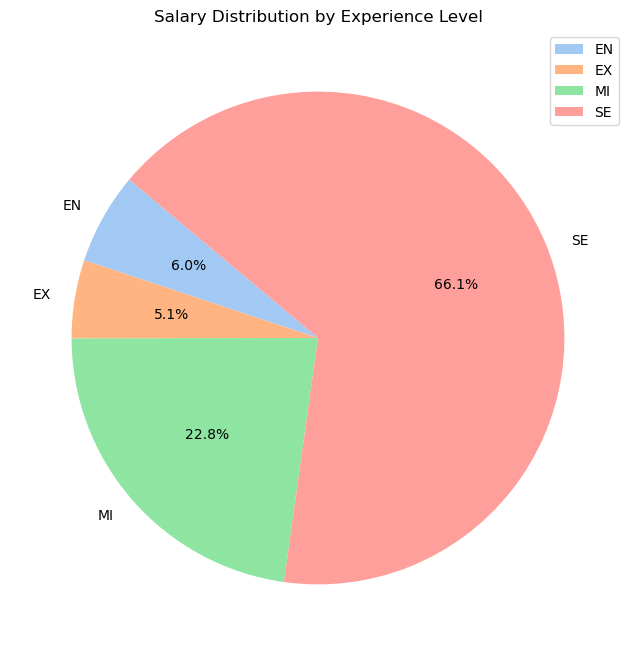

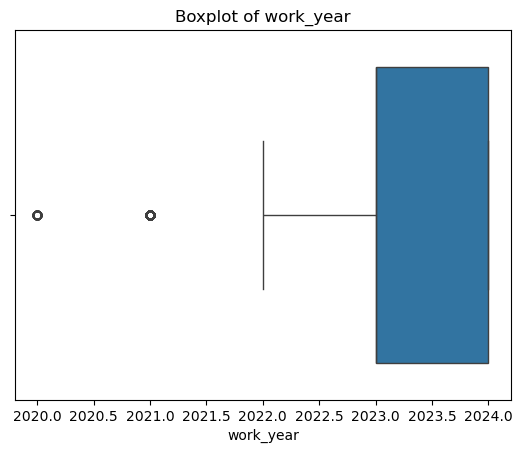

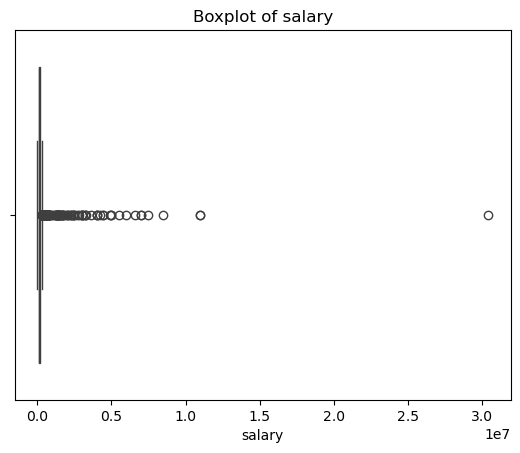

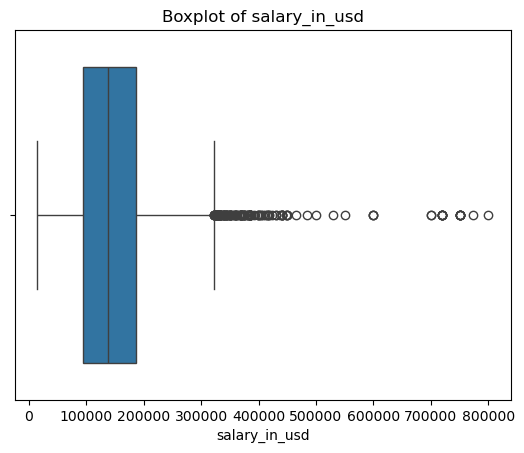

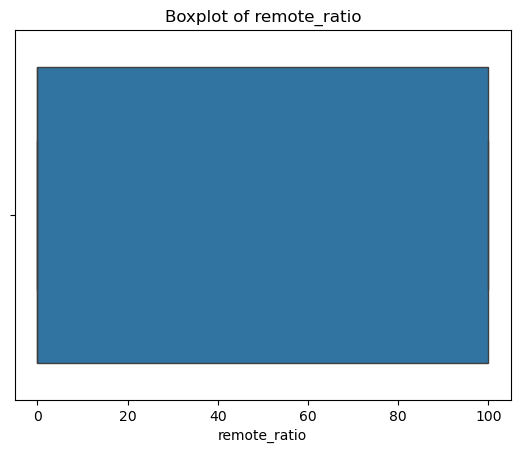


Data split into training and testing sets.

Model training completed!

Model Evaluation:
Mean Squared Error (MSE): 0.02
R-squared (R2 Score): 0.98

Model has been saved as 'model.pkl'.


In [3]:


# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

# Step 2: Load the Dataset
df = pd.read_csv('Dssalaries.csv')  # Replace with your dataset file name
print
print("Dataset loaded successfully!")


# Step 3: Initial Data Inspection
print("\nDataset Head:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDuplicate Records:")
print(df.duplicated().sum())
df = df.drop_duplicates()  # Remove duplicates

# Step 4: Handle Missing Values
df.fillna(df.mean(numeric_only=True), inplace=True)  # Fill missing numerical values with mean
for column in df.select_dtypes(include='object').columns:  # Fill missing categorical values with mode
    df[column].fillna(df[column].mode()[0], inplace=True)

print("\nMissing values handled!")

# Step 5: Exploratory Data Analysis (EDA)
# Distribution of target variable (Replace 'salary_in_usd' with your actual target column)
target_column = 'salary_in_usd'
if target_column in df.columns:
    sns.histplot(df[target_column], kde=True, bins=30)
    plt.title('Target Variable Distribution')
    plt.show()

# Pie Chart: Salaries by Experience Level
experience_salaries = df.groupby('experience_level')['salary_in_usd'].sum()  # Group by experience level and sum salaries

plt.figure(figsize=(8, 8))
experience_salaries.plot.pie(
    autopct='%1.1f%%',  # Show percentages
    startangle=140,     # Rotate the pie chart
    colors=sns.color_palette('pastel'),  # Use pastel colors
    labels=experience_salaries.index,    # Add labels for experience levels
    legend=True
)
plt.title('Salary Distribution by Experience Level')
plt.ylabel('')  # Remove y-axis label
plt.show()


# Boxplots for numeric columns
for column in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Step 6: Encode Categorical Variables
le = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = le.fit_transform(df[column])  # Transform categorical columns

# Step 7: Feature Scaling
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])  # Scale numerical features

# Step 8: Split the Data into Train and Test Sets
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData split into training and testing sets.")

# Step 9: Train a Regression Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)  # Train the model
print("\nModel training completed!")

# Step 10: Evaluate the Model
y_pred = model.predict(X_test)  # Predict on test data
print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared (R2 Score): {r2_score(y_test, y_pred):.2f}")

# Step 11: Save the Trained Model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("\nModel has been saved as 'model.pkl'.")
